# Analise Da Tabela De Startups 

## 1. Introducao 
Nesta análise, foi explorado dados de diversas startups dos Estados Unidos com o objetivo de identificar tendências e  insights sobre localização, setores, financiamento e sucesso das mesmas.

## 2. Carregamento e Preparação dos Dados

### 2.1. Importação das Bibliotecas

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Carregamento dos dados

In [18]:
df = pd.read_excel(r'/Users/christophe/Downloads/dados_startups.xlsx') #Substitua pelo seu local de arquivo
print(df.head()) 
print(len(df))  

   Unnamed: 0 state_code  latitude  longitude zip_code       id  \
0        1005         CA   4235888   -7105682    92101   c:6669   
1         204         CA  37238916 -121973718    95032  c:16283   
2        1001         CA  32901049 -117192656    92121  c:65620   
3         738         CA  37320309  -12205004    95014  c:42668   
4        1002         CA  37779281 -122419236    94105  c:65806   

            city              Unnamed: 6               name  labels  ...  \
0      San Diego                     NaN        Bandsintown       1  ...   
1      Los Gatos                     NaN          TriCipher       1  ...   
2      San Diego      San Diego CA 92121              Plixi       1  ...   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1  ...   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0  ...   

  object_id has_VC has_angel has_roundA has_roundB has_roundC has_roundD  \
0    c:6669      0         1          0          0          0   

- O DataFrame possui 49 colunas com 923 linhas

In [19]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500
count,923.000000,9.230000e+02,9.230000e+02,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,9.372312e+14,-7.446777e+14,0.646804,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,...,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,0.809317
std,333.585431,5.145703e+15,2.542555e+15,0.478222,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,...,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,0.393052
min,1.000000,3.271540e+05,-1.224036e+16,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,283.500000,3.735447e+07,-1.224192e+08,0.000000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,577.000000,3.777928e+07,-1.219663e+08,1.000000,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,866.500000,4.237537e+07,-7.407653e+07,1.000000,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1153.000000,4.078788e+16,1.805712e+08,1.000000,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- As Startups do DataFrame vao de 1984 ate 2013
- 75% das Startups foram criadas  nos anos 2000

In [20]:
perct_missing_values = df.isnull().sum()*100 / len(df)
perct_missing_values.sort_values()

Unnamed: 0                   0.000000
state_code                   0.000000
latitude                     0.000000
longitude                    0.000000
zip_code                     0.000000
id                           0.000000
city                         0.000000
name                         0.000000
age_first_funding_year       0.000000
labels                       0.000000
founded_at                   0.000000
first_funding_at             0.000000
age_last_funding_year        0.000000
last_funding_at              0.000000
relationships                0.000000
funding_rounds               0.000000
category_code                0.000000
is_software                  0.000000
milestones                   0.000000
funding_total_usd            0.000000
is_CA                        0.000000
is_TX                        0.000000
is_MA                        0.000000
is_NY                        0.000000
is_mobile                    0.000000
is_otherstate                0.000000
is_web      

In [21]:
print(df.info())

df = df.drop_duplicates() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                923 non-null    int64 
 1   state_code                923 non-null    object
 2   latitude                  923 non-null    int64 
 3   longitude                 923 non-null    int64 
 4   zip_code                  923 non-null    object
 5   id                        923 non-null    object
 6   city                      923 non-null    object
 7   Unnamed: 6                430 non-null    object
 8   name                      923 non-null    object
 9   labels                    923 non-null    int64 
 10  founded_at                923 non-null    object
 11  closed_at                 335 non-null    object
 12  first_funding_at          923 non-null    object
 13  last_funding_at           923 non-null    object
 14  age_first_funding_year    

**Observação:**
- Os dados foram carregados do arquivo `dados_startups.xlsx`.
- Duplicatas foram removidas para garantir a qualidade dos dados.

 ## 3. Analise Demografica 

### 3.1. Distribuição por Cidade e Estado

city
San Francisco    128
New York          91
Mountain View     47
Palo Alto         35
Austin            27
Santa Clara       27
Seattle           26
San Mateo         26
Sunnyvale         22
San Jose          18
Cambridge         16
Menlo Park        16
San Diego         15
Los Angeles       15
Redwood City      14
Boston            13
Chicago           13
Waltham           12
Burlington        11
Santa Monica      10
Name: count, dtype: int64
state_code
CA    488
NY    106
MA     83
WA     42
TX     42
Name: count, dtype: int64


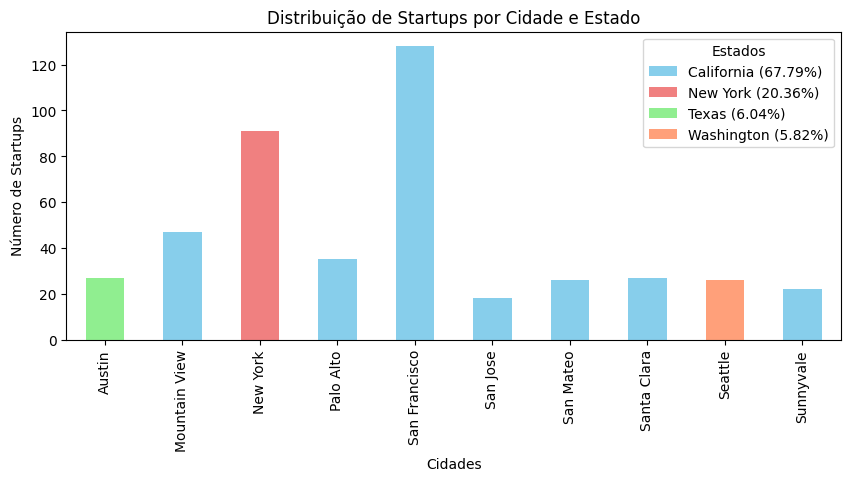

In [22]:
print(df['city'].value_counts().head(20))
print(df['state_code'].value_counts().head(5))

estados = ['California', 'Nova York', 'Massachusetts', 'Washington', 'Texas']
dados = {
    'Cidades': ['San Francisco', 'New York', 'Mountain View', 'Palo Alto', 'Austin', 'Santa Clara', 'Seattle', 'San Mateo', 'Sunnyvale', 'San Jose'],
    'Startups': [128, 91, 47, 35, 27, 27, 26, 26, 22, 18],
    'Estados': ['California', 'New York', 'California', 'California', 'Texas', 'California', 'Washington', 'California', 'California', 'California']
}

# Novo DataFrame criado apenas para a análise demográfica, nao sobrescrevendo o original
df_cidades_estados = pd.DataFrame(dados)

total_startups = df_cidades_estados['Startups'].sum()

df_cidades_estados['Percentual'] = (df_cidades_estados['Startups'] / total_startups) * 100

df_grouped = df_cidades_estados.groupby(['Estados', 'Cidades']).sum().unstack().fillna(0)

# A transposição é feita para facilitar a visualização das cidades como colunas, deixando o gráfico mais claro.
df_grouped = df_grouped['Startups'].T

df_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue'], figsize=(10, 4))

percentual_por_estado = df_cidades_estados.groupby('Estados')['Percentual'].sum()

plt.title('Distribuição de Startups por Cidade e Estado')
plt.xlabel('Cidades')
plt.ylabel('Número de Startups')
plt.legend(title='Estados', labels=[f'{estado} ({percentual:.2f}%)' for estado, percentual in percentual_por_estado.items()])
plt.show()

**Resultados**:
Verifica-se que o estado da California possui o maior numero de startups do país com aproximadamente 67,8% do total, com destaque para a cidade de San Francisco. isso se deve principalmente a presenca 
- Do vale do silicio na regiao, sendo o mesmo um centro mundial de tecnologia e inovação.

- De universidades qualificadas como Stanford, UC Berkeley, e Caltech

- De políticas e Incentivos favoraveis a inovações tecnológicas em comparação com outras regiões.

## 4. Analise De Setores 

### 4.1. Top 10 Setores por Número de Startups

category_code
software           153
web                144
mobile              79
enterprise          73
advertising         62
games_video         52
semiconductor       35
biotech             34
network_hosting     34
hardware            27
Name: count, dtype: int64


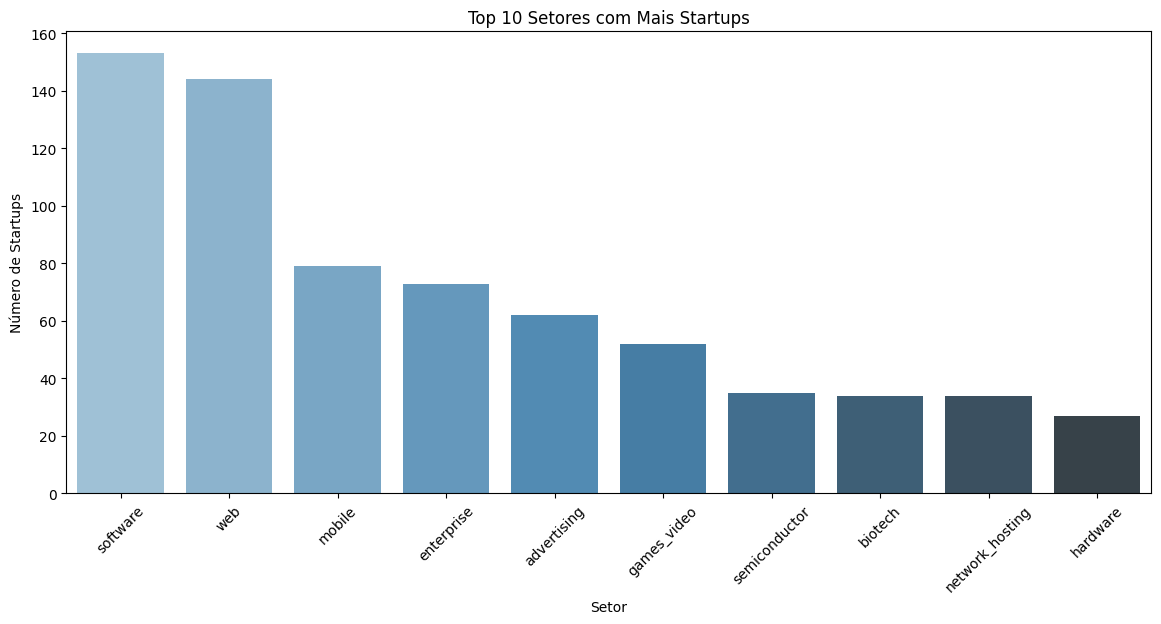

In [23]:
sector_counts = df['category_code'].value_counts().head(10)
print(sector_counts)

plt.figure(figsize=(14, 6))

# A funcao hue=sector_counts.index foi utilizada para evitar erros em atualizações futuras do seaborn, onde será obrigatório usar pallette com hue
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette ='Blues_d', hue=sector_counts.index)
plt.title('Top 10 Setores com Mais Startups')
plt.xlabel('Setor')
plt.ylabel('Número de Startups')
plt.xticks(rotation=45)

plt.show()


- O setor de software domina com o maior numero de statups, seguido pelo setor web e mobile 

### 4.2. Top 10 setores por numero de startups bem sucedidas

In [24]:
# Foi considerado startups com status "acquired". como bem-sucedidas
successful_startups = df[df['status'].isin(['acquired'])]
successful_sector_counts = successful_startups['category_code'].value_counts().head(10)
print(successful_sector_counts)



category_code
software           101
web                 93
enterprise          56
mobile              52
advertising         45
games_video         31
network_hosting     24
semiconductor       24
biotech             22
analytics           16
Name: count, dtype: int64


- O setor de software possui o maior numero de startups bem sucedidas (adquiridas)

### 4.3. Top 10 setores por financiamento total

category_code
mobile           7263750881
software         2657598865
web              1729035436
biotech          1723699484
enterprise       1338882096
cleantech        1300284730
semiconductor    1105156970
advertising       918619012
games_video       844643530
hardware          773938873
Name: funding_total_usd, dtype: int64


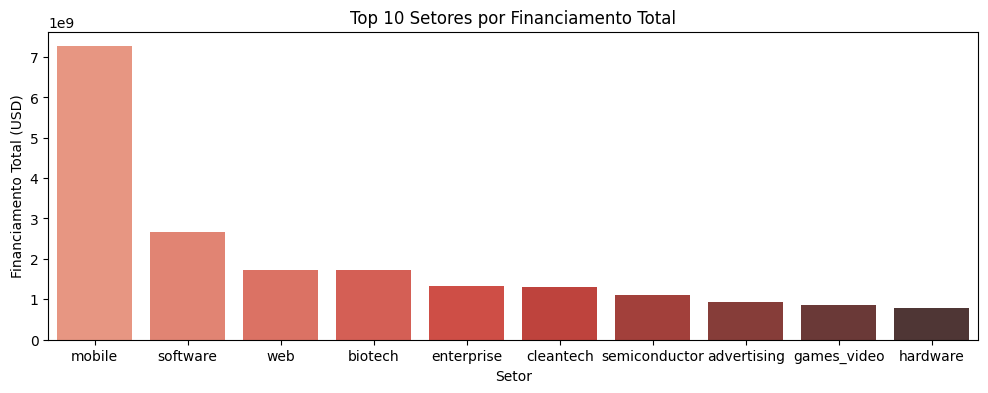

In [25]:
sector_funding = df.groupby('category_code')['funding_total_usd'].sum().sort_values(ascending=False).head(10)
print(sector_funding)

plt.figure(figsize=(12, 4))
sns.barplot(x=sector_funding.index, y=sector_funding.values, palette='Reds_d', hue = sector_funding.index)
plt.title('Top 10 Setores por Financiamento Total')
plt.xlabel('Setor')
plt.ylabel('Financiamento Total (USD)')
plt.show()


- Embora o setor de software possua o maior numero de startups e startups bem sucedidas. é o setor mobile que recebeu o maior financiamento com 7.263.750.881 de Dolares investidos 

## 5. Analise Atemporal 

### 5.1. Numero de fechamentos e fundacoes por ano

founded_at
1984      1
1985      1
1990      1
1992      1
1995      1
1996      3
1997      3
1998      4
1999     11
2000     65
2001     41
2002     58
2003     64
2004     71
2005    102
2006    107
2007    104
2008     87
2009     82
2010     72
2011     31
2012     10
2013      3
Name: count, dtype: int64
closed_at
2001.0      2
2005.0      1
2007.0      3
2008.0     15
2009.0     28
2010.0     32
2011.0     49
2012.0    112
2013.0     93
Name: count, dtype: int64


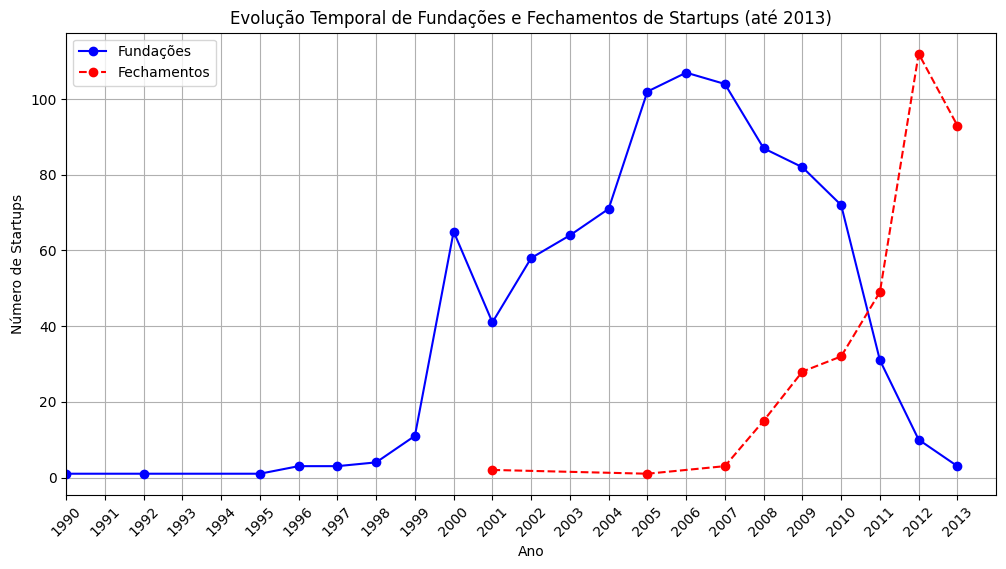

In [26]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce') # Utilizou-se o errors ='coerce' para lidar com datas invalidas e evitar erros.
df['closed_at'] = pd.to_datetime(df['closed_at'], errors='coerce')

founded_by_year = df['founded_at'].dt.year.value_counts().sort_index() # A funcao sort_index() esta presente para ordenar cronologicamente as contagens feitas por ano.
closed_by_year = df['closed_at'].dt.year.value_counts().sort_index()

print(founded_by_year)
print(closed_by_year)

plt.figure(figsize=(12, 6))

plt.plot(founded_by_year.index, founded_by_year.values, label='Fundações', marker='o', linestyle='-', color='blue')

plt.plot(closed_by_year.index, closed_by_year.values, label='Fechamentos', marker='o', linestyle='--', color='red')

plt.title('Evolução Temporal de Fundações e Fechamentos de Startups (até 2013)')
plt.xlabel('Ano')
plt.ylabel('Número de Startups')
plt.legend()
plt.grid(True)

plt.xlim(left=1990, right=2014)  # Os dados vao ate 2013, mas Limitei até 2014 apenas por uma questao de deixar o grafico mais enquadrado.
plt.xticks(list(range(1990, 2014)), rotation=45)  

plt.show()


**Resultados**: Os anos de 2005, 2006 e 2007 foram os que tiveram o maior numero de fundacoes. Entretanto, devido a chamada **"explosao da bolha de startups de 2012"**, houve um recorde de fechamentos naquele ano, e o numero de fundacoes tambem atingiu o seu minimo no ano seguinte, isso aconteceu principalmete devido a 
- Falta de financiamento por parte de investidores.
- O mercado de startups nos EUA estava altamente competitivo
- Muitas startups estavam gastando mais dinheiro do que estavam ganhando

### 5.2. Tempo de vida medio 

 5.94 anos


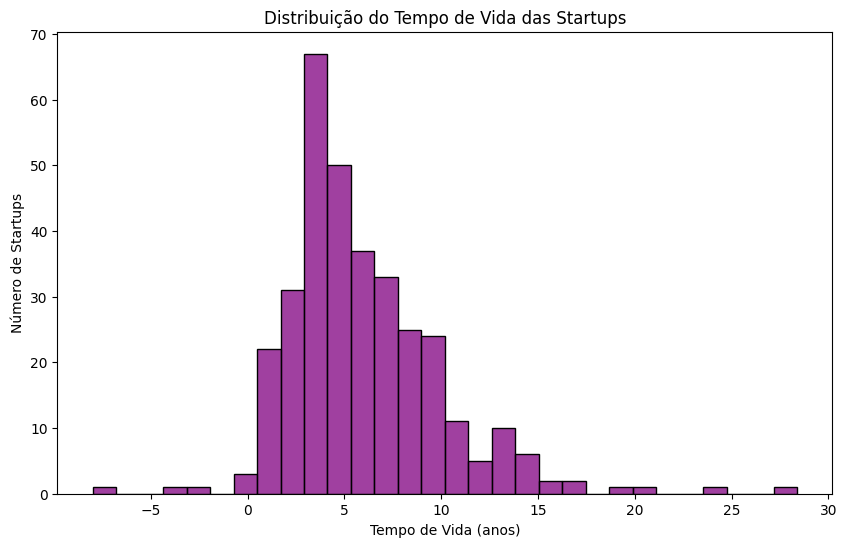

In [27]:
df['lifetime'] = (df['closed_at'] - df['founded_at']).dt.days / 365.25  # Converçao para anos

average_lifetime = df['lifetime'].mean()
print(f' {average_lifetime:.2f} anos')

plt.figure(figsize=(10, 6))
sns.histplot(df['lifetime'].dropna(), bins=30, color='purple')

plt.title('Distribuição do Tempo de Vida das Startups')
plt.xlabel('Tempo de Vida (anos)')
plt.ylabel('Número de Startups')
plt.show()

- O tempo de vida medio de uma startup é de 5.94 anos, apos isso a maioria ja pode ser classificada como bem sucedida ou não

## 6. Analise Financeira 


### 6.1. Total de Financiamento por Estado

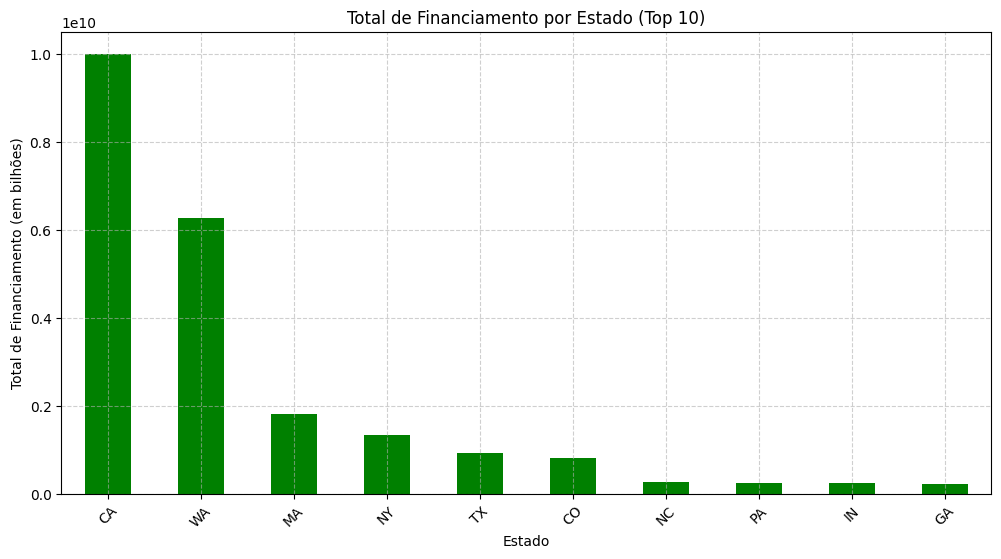

In [28]:
financiamento_por_estado = df.groupby('state_code')['funding_total_usd'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

financiamento_por_estado.plot(kind='bar', color='green')

plt.title('Total de Financiamento por Estado (Top 10)')
plt.xlabel('Estado')
plt.ylabel('Total de Financiamento (em bilhões)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



- O estado da California recebeu o maior financiamento em startups, com 10 bilhoes de dolares sendo investidos na regiao. Washington e Massachusetts vem logo em seguida com aproximadamente 6.2 bilhoes e 1.9 bilhoes respectivamente.

### 6.2. Financiamento medio por Status

Financiamento médio para cada status (em USD):
status
acquired    3.104662e+07
closed      1.511532e+07
Name: funding_total_usd, dtype: float64


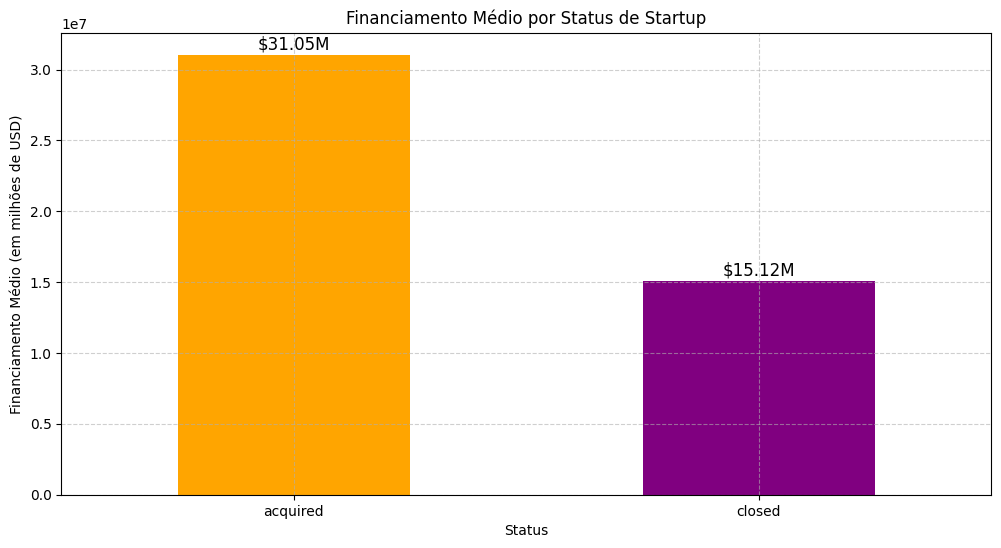

In [29]:
financiamento_sucesso = df.groupby('status')['funding_total_usd'].mean()

print("Financiamento médio para cada status (em USD):")
print(financiamento_sucesso)

plt.figure(figsize=(12, 6))

financiamento_sucesso.plot(kind='bar', color=['orange', 'purple'])

plt.title('Financiamento Médio por Status de Startup')
plt.xlabel('Status')
plt.ylabel('Financiamento Médio (em milhões de USD)')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)

# Os valores extaos foram adicionado no topo da barra apenas para uma precisao maior da analise
for index, value in enumerate(financiamento_sucesso):
    plt.text(index, value + 0.1e6, f'${value/1e6:.2f}M', ha='center', va='bottom', fontsize=12)

plt.show()

- Statups consideradas bem sucedidas tiveram um financiamento medio de 31 milhoes, enquanto as fechadas tiveram um financiamento medio com metade desse valor.

## 7. Analise De Status 

### 7.1. Distribuição de Status das Startups

status
acquired    597
closed      326
Name: count, dtype: int64


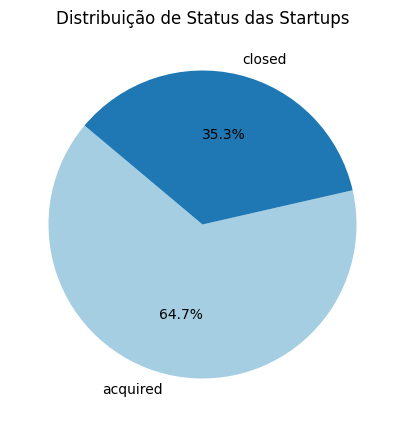

In [30]:
status_counts = df['status'].value_counts()
print(status_counts)

plt.figure(figsize=(5, 5))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Distribuição de Status das Startups')

plt.show()

 - Mais da metade das startups do dataframe foram adquiridas, enquanto apenas 35.3% foram fechadas

## 8. Conclusao 

Baseando-se nos dados obtidos ao longo da analise, podemos destacar os seguintes fatores como indicativos de sucesso para uma startup:



**1. Localização geográfica:**
- A Califórnia lidera o cenário de startups no país com 67.8% das startups analisadas, especialmente na região do Vale do Silício (San Francisco, Palo Alto, Mountain View). Isso reforça a ideia de que startups localizadas em grandes hubs tecnológicos têm maior chance de sucesso devido à proximidade de investidores, infraestrutura tecnológica, e uma rede de contatos robusta.

**2. Setor de atuação:**
- Setores mais ligados à tecnologia e à inovação tendem a atrair mais investimentos. Setores como software, serviços de internet e saúde digital destacam-se entre os mais financiados, indicando que a inovação tecnológica é um fator de sucesso crítico.

**3. Financiamento:**
- Startups que receberam maiores volumes de financiamento tendem a ter mais chances de sucesso (medido pelo status "acquired"). O acesso ao capital é fundamental para o crescimento e expansão, permitindo a criação de produtos competitivos e a atração de talentos.

**4. Status:**
- Entre as startups analisadas, mais da metade se consagraram como bem sucedidas. Fatores como financiamento medio, setor de atuacao e localizacao geografica sao os que mais influenciam no status final da startup. Contribuindo diretamente para a mesma ser classificada como adquired(sucesso) ou closed(fracasso). 

**5. Tendencias temporais:**
- A análise atemporal revelou que startups fundadas entre 2005 e 2010 foram as que mais se destacaram no mercado, tanto em termos de crescimento como de sucesso. No geral, os anos 2000 foram os melhores para criaçao de startups
